In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
f = open('spotify-data/StreamingHistory0.json')
json_raw = json.load(f)

data = pd.DataFrame()

def extract_json_value(name):
    return[i[name] for i in json_raw]

data['artist_name'] = extract_json_value('artistName')
data['end_time'] = extract_json_value('endTime')
data['ms_played'] = extract_json_value('msPlayed')
data['track_name'] = extract_json_value('trackName')

In [3]:
data['end_time'] = pd.to_datetime(data['end_time'])
data['minutes_played'] = data.ms_played.divide(60000)
data.drop('ms_played', axis=1, inplace=True)
data.drop(data[data['track_name'] == 'Unknown Track'].index, inplace=True)

### most listened artist

In [4]:
data.groupby(by='artist_name')['minutes_played'].sum().sort_values(ascending=False)[:15]

artist_name
Eminem                     4848.667283
Voor de Show in Toomler    4290.885300
Yes-R                      1831.887367
Nas                        1533.491917
Måneskin                    886.574700
Pierrii                     696.777883
Michael Jackson             610.797333
Nass                        598.329117
Winne                       539.936050
Ares                        529.624733
Fresku                      455.341450
Boef                        390.295300
Lil Kleine                  323.343133
Lijpe                       301.979567
Dave                        237.597200
Name: minutes_played, dtype: float64

### most listened songs

In [5]:
data.groupby(by='track_name')['minutes_played'].sum().sort_values(ascending=False)[:15]

track_name
Puinhoop                                         441.313450
Chosen                                           420.053200
Mijn Pad - Live in de Ziggo Dome                 396.601633
Chika                                            366.216350
Rare                                             359.211967
Zeus (feat. White Gold)                          319.072467
When I'm Gone - Instrumental                     297.265383
Regen                                            288.887100
Smooth Criminal - 2012 Remaster                  278.690483
Rock Bottom                                      260.437467
Lose Yourself                                    257.908700
Stepdad                                          253.368650
Positief                                         251.444550
Mijn Pad                                         232.201567
Dragostea Din Tei - Original Romanian Version    222.841217
Name: minutes_played, dtype: float64

In [6]:
data['day'] = [d.date() for d in data['end_time']]
data['weekday'] = [d.weekday() for d in data['day']]
data['time'] = [d.time() for d in data['end_time']]
data['weekday']
data.drop('end_time', axis=1, inplace=True)

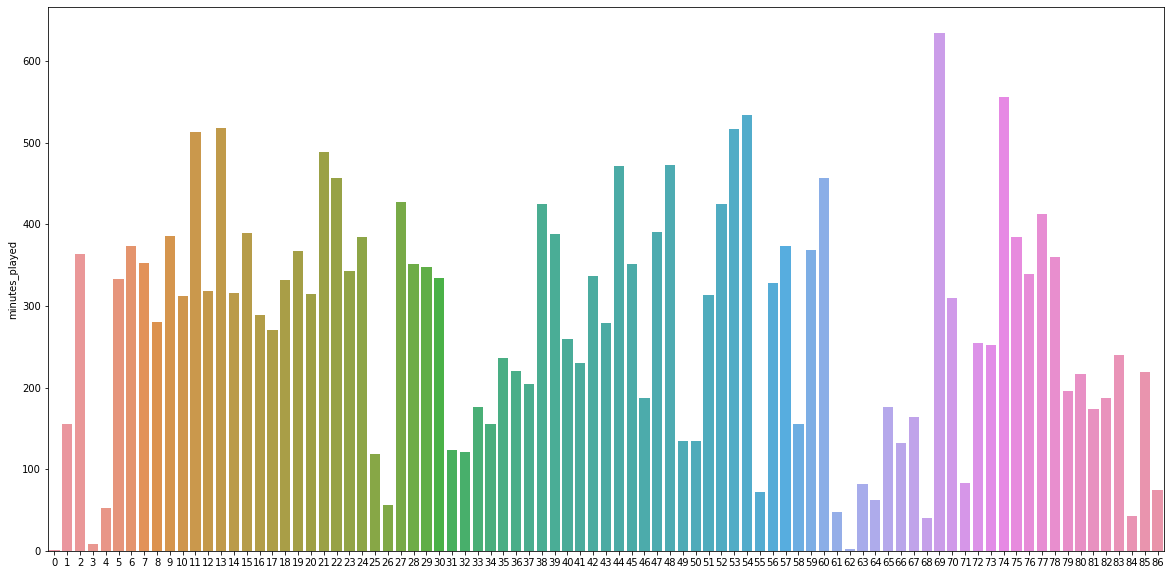

In [7]:
days_played = data.groupby('day').sum()
plt.figure(figsize=(20,10))
fig = sns.barplot(y=days_played.minutes_played, x=list(range(len(days_played))))

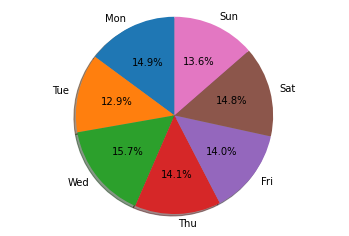

In [9]:
weekdays_played = data.groupby('weekday').sum()


labels = 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'
sizes = weekdays_played.minutes_played.tolist()


fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()



# plt.figure(figsize=(20,10))
# fig = sns.barplot(y=weekdays_played.minutes_played, x=list(range(7)))

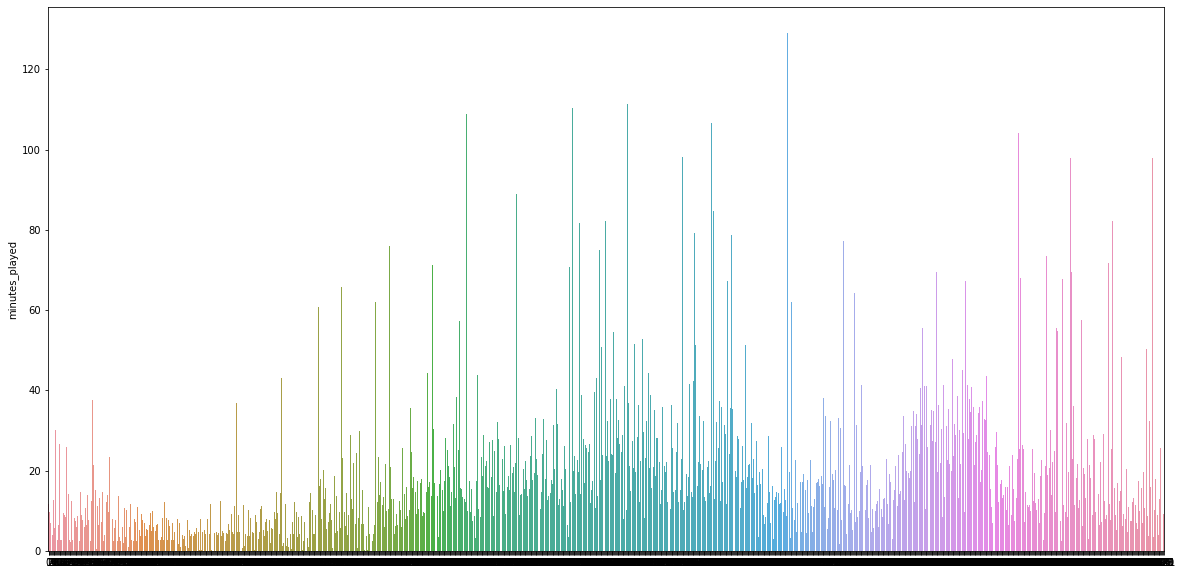

In [10]:
time_played = data.groupby('time').sum()
plt.figure(figsize=(20,10))
fig = sns.barplot(y=time_played.minutes_played, x=list(range(len(time_played))))